<a href="https://colab.research.google.com/github/ArthurFDLR/pose-classification-kit/blob/master/examples/hand_pose_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤙 Pose Classification Kit: Hand pose classification model creation

This Notebook can be used to create Neural Network classifiers running in the [Pose Classification Kit](https://github.com/ArthurFDLR/pose-classification-kit).

First, we have to import several libraries to create and train a new model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import os

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    %tensorflow_version 2.x
    !pip install pose-classification-kit
    
import tensorflow
from tensorflow import keras
from pose_classification_kit.datasets import handDataset

print('Available GPU:')
!nvidia-smi -L
print('\nTensorFlow use GPU at: {}'.format(tensorflow.test.gpu_device_name()))

     |████████████████████████████████| 24.2 MB 23 kB/s 
1 Physical GPUs, 1 Logical GPUs
Available GPU:
GPU 0: Tesla T4 (UUID: GPU-65bbdbe4-42ed-f007-b0cb-f5b30cba9c3f)

TensorFlow use GPU at: /device:GPU:0


## Import dataset

In [2]:
dataset = handDataset(testSplit=.2, shuffle=True, handID=1)
x_train = dataset['x_train']
y_train = dataset['y_train_onehot']
labels = dataset['labels']

x_train.shape, y_train.shape

((4347, 42), (4347, 27))

## Models exploration

This section is optional. The following blocks can be used to compare different model architecture and training processes.

In [3]:
model_train_history = {}
input_dim = x_train.shape[1]
validation_split = 0.20
epochs = 15

In [4]:
model = keras.models.Sequential(name = 'ANN-3x16',
    layers =
    [
        keras.layers.InputLayer(input_shape=input_dim),
        keras.layers.Dense(16, activation=keras.activations.relu),
        keras.layers.Dense(16, activation=keras.activations.relu),
        keras.layers.Dense(16, activation=keras.activations.relu),
        keras.layers.Dense(len(labels), activation=keras.activations.softmax),
    ]
)

model.summary()
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model_train_history[model] = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    batch_size=4,
    validation_split=validation_split,
    shuffle=True,
    verbose=1,
)

Model: "ANN-3x16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                688       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 27)                459       
Total params: 1,691
Trainable params: 1,691
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
870/870 [==============================] - 6s 3ms/step - loss: 2.0095 - accuracy: 0.4464 - val_loss: 0.7066 - val_accuracy: 0.7874
Epoch 2/15
870/870 [==============================] - 3s 3ms/step - loss: 0.3870 - accuracy: 0.9154 - val_loss: 

In [5]:
model = keras.models.Sequential(name = 'ANN-3x64',
                                   layers =
    [
        keras.layers.InputLayer(input_shape=input_dim),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dense(len(labels), activation=keras.activations.softmax),
    ]
)

model.summary()
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model_train_history[model] = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    batch_size=4,
    validation_split=validation_split,
    shuffle=True,
    verbose=1,
)

Model: "ANN-3x64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                2752      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 27)                1755      
Total params: 12,827
Trainable params: 12,827
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
870/870 [==============================] - 3s 3ms/step - loss: 0.8609 - accuracy: 0.7831 - val_loss: 0.1198 - val_accuracy: 0.9701
Epoch 2/15
870/870 [==============================] - 2s 3ms/step - loss: 0.0710 - accuracy: 0.9825 - val_loss

In [6]:
model = keras.models.Sequential(name = 'ANN-3x64-Dropouts',
                                   layers =
    [
        keras.layers.InputLayer(input_shape=input_dim),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(len(labels), activation=keras.activations.softmax),
    ]
)

model.summary()
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model_train_history[model] = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    batch_size=4,
    validation_split=validation_split,
    shuffle=True,
    verbose=1,
)

Model: "ANN-3x64-Dropouts"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                2752      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 27)          

In [7]:
model = keras.models.Sequential(name = 'ANN-2x128',
                                   layers =
    [
        keras.layers.InputLayer(input_shape=input_dim),
        keras.layers.Dense(128, activation=keras.activations.relu),
        keras.layers.Dense(128, activation=keras.activations.relu),
        keras.layers.Dense(len(labels), activation=keras.activations.softmax),
    ]
)

model.summary()
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model_train_history[model] = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    batch_size=4,
    validation_split=validation_split,
    shuffle=True,
    verbose=1,
)

Model: "ANN-2x128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               5504      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 27)                3483      
Total params: 25,499
Trainable params: 25,499
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
870/870 [==============================] - 3s 3ms/step - loss: 0.7049 - accuracy: 0.8473 - val_loss: 0.0971 - val_accuracy: 0.9793
Epoch 2/15
870/870 [==============================] - 3s 3ms/step - loss: 0.0516 - accuracy: 0.9882 - val_loss: 0.0384 - val_accuracy: 0.9920
Epoch 3/15
870/870 [==============================] - 3s 3ms/step - loss: 0.0249 - accuracy: 0.9940

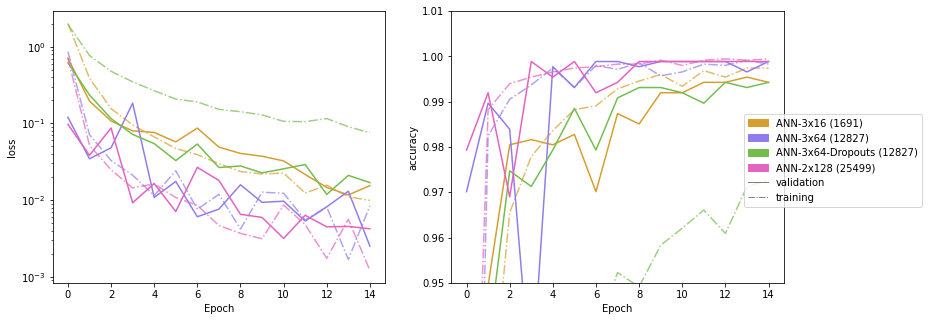

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(14,5))
colors_graph = ["#d69e2d",
                "#927ced",
                "#73bd4d",
                "#e462c0",
                "#eb5e52"]
handles = []

for (model, history), color in zip(model_train_history.items(), colors_graph):
    label = '{} ({})'.format(model.name, model.count_params())
    axs[0].plot(history.history['loss'], c=color, ls='-.', alpha=.7)
    axs[1].plot(history.history['accuracy'], c=color, ls='-.', alpha=.7)
    axs[0].plot(history.history['val_loss'], c=color)
    axs[1].plot(history.history['val_accuracy'], c=color)
    handles.append(mpatches.Patch(color=color, label=label))

for ax in axs:
    ax.set_xlabel('Epoch')
axs[0].set_ylabel('loss')
axs[0].set_yscale('log')
axs[1].set_ylabel('accuracy')
axs[1].set_ylim(0.95,1.01)

handles.append(Line2D([0], [0], color='grey', lw=1, ls='-', label='validation'))
handles.append(Line2D([0], [0], color='grey', lw=1, ls='-.', label='training'))

fig.subplots_adjust(right=0.85)
fig.legend(handles=handles,
           loc="center right",
           borderaxespad=1)

## Model export

Once you have a good model, you can save it on your Google Drive. The model is saved using the [folder hierarchy of OpenHand](https://github.com/ArthurFDLR/OpenHand-App#pose-classifier-models).

In [9]:
from pathlib import Path
import json

model_name = 'ANN_RightHand_1'

if IN_COLAB:
    content_path = Path('/').absolute() / 'content'
    drive_path = content_path / 'drive'
    google.colab.drive.mount(str(drive_path))
    save_path = drive_path / 'My Drive'
    
    for subfolder in ['Pose Classification Kit', 'Models', model_name]:
        save_path /= subfolder
        if not (save_path).is_dir():
            %mkdir "{save_path}"
else:
    save_path = Path('.').absolute() / model_name
    %mkdir "{save_path}"

model_path = save_path / '{name}.h5'.format(name = model_name)

Mounted at /content/drive


In [10]:
model = keras.models.Sequential(name = '27Class_3x64',
                                   layers =
    [
        keras.layers.InputLayer(input_shape=input_dim),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dense(64, activation=keras.activations.relu),
        keras.layers.Dense(len(labels), activation=keras.activations.softmax),
    ]
)

model.summary()
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(
    x=x_train,
    y=y_train,
    epochs=10,
    batch_size=4,
    validation_split=0.15,
    shuffle=True,
    callbacks=[keras.callbacks.ModelCheckpoint(filepath=model_path, verbose=1, save_best_only=True)],
    verbose = 2,
)

with open(save_path / 'class.json', 'w') as f:
    json.dump({'labels':labels}, f)

Model: "27Class_3x64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                2752      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 27)                1755      
Total params: 12,827
Trainable params: 12,827
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
924/924 - 3s - loss: 0.8317 - accuracy: 0.7856 - val_loss: 0.1262 - val_accuracy: 0.9648

Epoch 00001: val_loss improved from inf to 0.12617, saving model to /content/drive/My Drive/Pose Classification Kit/Models/ANN_RightHand_1/ANN_Righ

In [11]:
model = keras.models.load_model(model_path)
model.evaluate(x=dataset['x_test'], y=dataset['y_test_onehot'])

34/34 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.9981


[0.007146174553781748, 0.9981481432914734]